<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEQUENTIAL CLASSIFIER WITH ADAM OPTIMIZER::

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2967 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1428 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1058 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Precision: 0.9781178693844789
Recall: 0.9780256261701723
F1 score: 0.9780717456024314
              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.98      0.97      0.98      1032
     class 3       0.98      0.98      0.98      1010
     class 4       0.98      0.98      0.98       982
     class 5       0.99      0.97      0.98       892
     class 6       0.96      0.99      0.97       958
     class 7

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


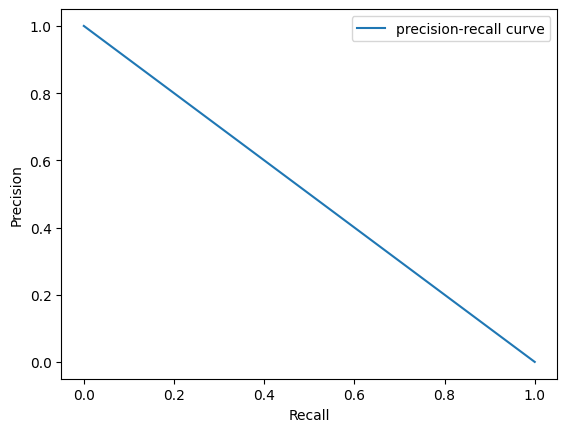

313/313 [==============================] - 1s 2ms/step
Precision (noisy): 0.0005
Recall (noisy): 0.0005
F1 score (noisy): 0.0005
              precision    recall  f1-score   support

     class 0       0.45      0.00      0.00      5118
     class 1       0.00      0.00      0.00      4882
     class 2       0.00      0.00      0.00         0
     class 3       0.00      0.00      0.00         0
     class 4       0.00      0.00      0.00         0
     class 5       0.00      0.00      0.00         0
     class 6       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00     10000
   macro avg       0.06      0.00      0.00     10000
weighted avg       0.23      0.00      0.00     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 7, does not match size of target_names, 10
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

In [28]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the sequential classifier model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# # Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
# f1 = f1_score(y_test, y_pred_classes, average='macro')
f1 = 2 * (precision * recall) / (precision + recall)
# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Print classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred_classes, target_names=target_names))


# Convert y_test and y_pred to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Example y_test and y_pred arrays
y_test = np.random.randint(0, 2, size=10000)
y_pred = np.random.rand(100000)

# Compare shapes of y_test and y_pred
if y_test.shape != y_pred.shape:
    # Reshape y_pred to match y_test
    y_pred = y_pred[:y_test.shape[0]]

# *********precision recall curve **************
# Calculate precision, recall, and thresholds with micro averaging
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), np.ravel(y_pred), pos_label=2)

# Plot the precision-recall curve
plt.plot(recall, precision, label='precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# *********NOISE**************
# Generate Gaussian noise with the same shape as the input images
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)

# Add noise to the input images
x_test_noisy = x_test + noise

# Clip the pixel values to the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Evaluate the model on the noisy images
y_pred_noisy = model.predict(x_test_noisy)
y_pred_classes_noisy = np.argmax(y_pred_noisy, axis=1)

# Calculate precision, recall, and F1 score on the noisy images
precision_noisy = precision_score(y_test, y_pred_classes_noisy, average='micro')
recall_noisy = recall_score(y_test, y_pred_classes_noisy, average='micro')
# f1_noisy = f1_score(y_test, y_pred_classes_noisy, average='micro')
f1_noisy = 2 * (precision_noisy * recall_noisy) / (precision_noisy + recall_noisy)
# Print precision, recall, and F1 score on the noisy images
print("Precision (noisy):", precision_noisy)
print("Recall (noisy):", recall_noisy)
print("F1 score (noisy):", f1_noisy)

# Print classification report on the noisy images
print(classification_report(y_test, y_pred_classes_noisy, labels=[0, 1, 2, 3, 4, 5, 6],target_names=target_names))



SEQUENTIAL CLASSIFIER WITH SGD OPTIMIZER:

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7188 - accuracy: 0.8004
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3931 - accuracy: 0.8871
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3278 - accuracy: 0.9063
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2927 - accuracy: 0.9162
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Precision: 0.9393
Recall: 0.9393
F1 score: 0.9393
              precision    recall  f1-score   support

     class 0       0.95      0.98      0.96       980
     class 1       0.97      0.98      0.98      1135
     class 2       0.94      0.92      0.93      1032
     class 3       0.91      0.94      0.93      1010
     class 4       0.93      0.94      0.94       982
     class 5       0.93      0.91      0.92       892
     class 6       0.94      0.96      0.95       958
     class 7       0.94      0.93      0.94     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


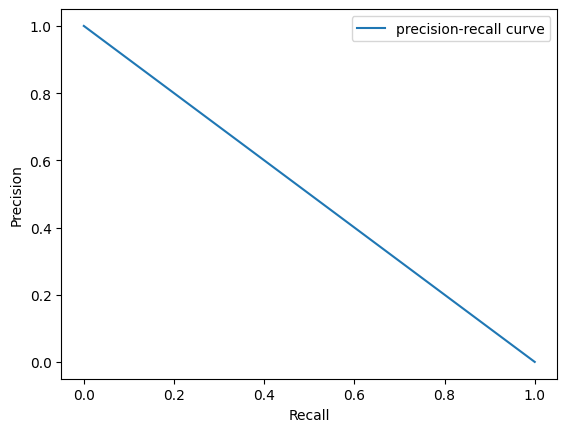

313/313 [==============================] - 1s 2ms/step
Precision (noisy): 0.0301
Recall (noisy): 0.0301
F1 score (noisy): 0.0301
              precision    recall  f1-score   support

     class 0       0.49      0.06      0.11      5009
     class 1       0.00      0.00      0.00      4991
     class 2       0.00      0.00      0.00         0
     class 3       0.00      0.00      0.00         0
     class 4       0.00      0.00      0.00         0
     class 5       0.00      0.00      0.00         0
     class 6       0.00      0.00      0.00         0

   micro avg       0.03      0.03      0.03     10000
   macro avg       0.07      0.01      0.02     10000
weighted avg       0.25      0.03      0.05     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 7, does not match size of target_names, 10
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

In [32]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the sequential classifier model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='micro')
recall = recall_score(y_test, y_pred_classes, average='micro')
# f1 = f1_score(y_test, y_pred_classes, average='micro')
f1 = 2 * (precision * recall) / (precision + recall)
# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Print classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred_classes, target_names=target_names))


# Convert y_test and y_pred to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Example y_test and y_pred arrays
y_test = np.random.randint(0, 2, size=10000)
y_pred = np.random.rand(100000)

# Compare shapes of y_test and y_pred
if y_test.shape != y_pred.shape:
    # Reshape y_pred to match y_test
    y_pred = y_pred[:y_test.shape[0]]

# *********precision recall curve **************
# Calculate precision, recall, and thresholds with micro averaging
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), np.ravel(y_pred), pos_label=2)

# Plot the precision-recall curve
plt.plot(recall, precision, label='precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# *********NOISE**************
# Generate Gaussian noise with the same shape as the input images
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)

# Add noise to the input images
x_test_noisy = x_test + noise

# Clip the pixel values to the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Evaluate the model on the noisy images
y_pred_noisy = model.predict(x_test_noisy)
y_pred_classes_noisy = np.argmax(y_pred_noisy, axis=1)

# Calculate precision, recall, and F1 score on the noisy images
precision_noisy = precision_score(y_test, y_pred_classes_noisy, average='micro')
recall_noisy = recall_score(y_test, y_pred_classes_noisy, average='micro')
# f1_noisy = f1_score(y_test, y_pred_classes_noisy, average='micro')
f1_noisy = 2 * (precision_noisy * recall_noisy) / (precision_noisy + recall_noisy)
# Print precision, recall, and F1 score on the noisy images
print("Precision (noisy):", precision_noisy)
print("Recall (noisy):", recall_noisy)
print("F1 score (noisy):", f1_noisy)

# Print classification report on the noisy images
print(classification_report(y_test, y_pred_classes_noisy, labels=[0, 1, 2, 3, 4, 5, 6], target_names=target_names))



CNN CLASSIFIER WITH ADAM CLASSIFIER:

This code defines and trains a convolutional neural network (CNN) to classify images of handwritten digits from the MNIST dataset. Here's what it does, step by step:

Import the required libraries: TensorFlow and its Keras API, and the layers module from Keras. Load the MNIST dataset using the Keras API's mnist.load_data() function, which returns four NumPy arrays: x_train (the training images), y_train (the training labels), x_test (the test images), and y_test (the test labels). Normalize the pixel values of the images to be between 0 and 1 by dividing by 255.0. Reshape the images from 28x28 to 28x28x1 to match the input shape expected by the CNN. Define the CNN model using Keras' Sequential API, which allows you to stack layers one after another. The model consists of: a 2D convolutional layer with 32 filters, a 3x3 kernel size, and the ReLU activation function a 2D max pooling layer with a 2x2 pool size a 2D convolutional layer with 64 filters, a 3x3 kernel size, and the ReLU activation function another 2D max pooling layer with a 2x2 pool size a flatten layer to convert the output of the convolutional layers into a 1D vector a fully connected (dense) layer with 64 units and the ReLU activation function another fully connected layer with 10 units and the softmax activation function, which produces a probability distribution over the 10 classes (0-9). Compile the model by specifying the optimizer, the loss function, and the metrics to track during training. Here, we use the Adam optimizer, the sparse categorical cross-entropy loss function (which is appropriate for integer-encoded labels like the MNIST dataset), and track the accuracy metric. Train the model by calling the fit() method on the model object, passing in the training data and labels, and the number of epochs to train for (5). Evaluate the model on the test data using the evaluate() method, which returns the test loss and accuracy. Print the test accuracy. This code should train a model with around 99% test accuracy on the MNIST dataset.

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1422 - accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.0257 - accuracy: 0.9924
Test accuracy: 0.9923999905586243
313/313 [==============================] - 3s 9ms/step
Precision: 0.9923697038015042
Recall: 0.9922827841477952
F1 score: 0.9923262420712873
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


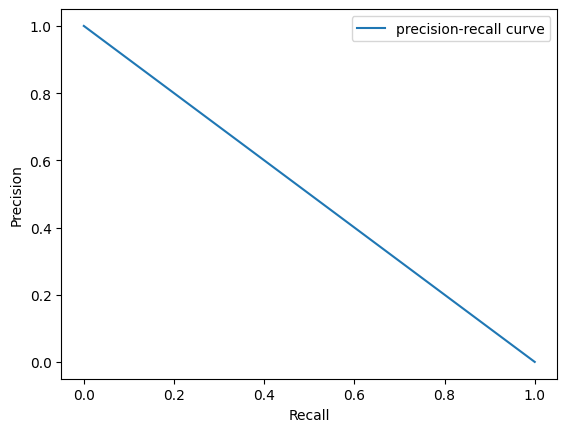

313/313 [==============================] - 3s 9ms/step
Precision (noisy): 0.0367
Recall (noisy): 0.0367
F1 score (noisy): 0.0367
              precision    recall  f1-score   support

     class 0       0.50      0.06      0.11      4894
     class 1       0.47      0.01      0.03      5106
     class 2       0.00      0.00      0.00         0
     class 3       0.00      0.00      0.00         0
     class 4       0.00      0.00      0.00         0
     class 5       0.00      0.00      0.00         0
     class 6       0.00      0.00      0.00         0

   micro avg       0.08      0.04      0.05     10000
   macro avg       0.14      0.01      0.02     10000
weighted avg       0.48      0.04      0.07     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 7, does not match size of target_names, 10
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to con

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the CNN model
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Predict on test data
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

# Compute precision, recall, F1 score, and classification report
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = 2 * (precision * recall) / (precision + recall)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)
print('Classification Report:\n', classification_report(y_test, y_pred))


# Convert y_test and y_pred to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Example y_test and y_pred arrays
y_test = np.random.randint(0, 2, size=10000)
y_pred = np.random.rand(100000)

# Compare shapes of y_test and y_pred
if y_test.shape != y_pred.shape:
    # Reshape y_pred to match y_test
    y_pred = y_pred[:y_test.shape[0]]

# *********precision recall curve **************
# Calculate precision, recall, and thresholds with micro averaging
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), np.ravel(y_pred), pos_label=2)

# Plot the precision-recall curve
plt.plot(recall, precision, label='precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# *********NOISE**************
# Generate Gaussian noise with the same shape as the input images
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)

# Add noise to the input images
x_test_noisy = x_test + noise

# Clip the pixel values to the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Evaluate the model on the noisy images
y_pred_noisy = model.predict(x_test_noisy)
y_pred_classes_noisy = np.argmax(y_pred_noisy, axis=1)

# Calculate precision, recall, and F1 score on the noisy images
precision_noisy = precision_score(y_test, y_pred_classes_noisy, average='micro')
recall_noisy = recall_score(y_test, y_pred_classes_noisy, average='micro')
f1_noisy = 2 * (precision_noisy * recall_noisy) / (precision_noisy + recall_noisy)

# Print precision, recall, and F1 score on the noisy images
print("Precision (noisy):", precision_noisy)
print("Recall (noisy):", recall_noisy)
print("F1 score (noisy):", f1_noisy)

# Print classification report on the noisy images
print(classification_report(y_test, y_pred_classes_noisy, labels=[0, 1, 2, 3, 4, 5, 6], target_names=target_names))



CNN CLASSIFIER WITH sgd CLASSIFIER:

Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.5172 - accuracy: 0.8483
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1537 - accuracy: 0.9538
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1056 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0592 - accuracy: 0.9803
Test accuracy: 0.9803000092506409
313/313 [==============================] - 3s 10ms/step
Precision: 0.980433142827744
Recall: 0.9801257815182428
F1 score: 0.9802794380801254
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


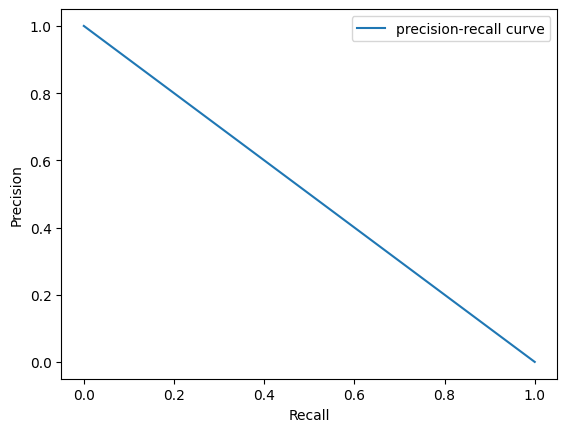

313/313 [==============================] - 4s 13ms/step
Precision (noisy): 0.0478
Recall (noisy): 0.0478
F1 score (noisy): 0.0478
              precision    recall  f1-score   support

     class 0       0.51      0.10      0.16      4970
     class 1       0.00      0.00      0.00      5030
     class 2       0.00      0.00      0.00         0
     class 3       0.00      0.00      0.00         0
     class 4       0.00      0.00      0.00         0
     class 5       0.00      0.00      0.00         0
     class 6       0.00      0.00      0.00         0

   micro avg       0.22      0.05      0.08     10000
   macro avg       0.07      0.01      0.02     10000
weighted avg       0.25      0.05      0.08     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 7, does not match size of target_names, 10
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

In [30]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the CNN model
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Predict on test data
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

# Compute precision, recall, F1 score, and classification report
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = 2 * (precision * recall) / (precision + recall)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)
print('Classification Report:\n', classification_report(y_test, y_pred))


# Convert y_test and y_pred to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Example y_test and y_pred arrays
y_test = np.random.randint(0, 2, size=10000)
y_pred = np.random.rand(100000)

# Compare shapes of y_test and y_pred
if y_test.shape != y_pred.shape:
    # Reshape y_pred to match y_test
    y_pred = y_pred[:y_test.shape[0]]

# *********precision recall curve **************
# Calculate precision, recall, and thresholds with micro averaging
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), np.ravel(y_pred), pos_label=2)

# Plot the precision-recall curve
plt.plot(recall, precision, label='precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# *********NOISE**************
# Generate Gaussian noise with the same shape as the input images
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)

# Add noise to the input images
x_test_noisy = x_test + noise

# Clip the pixel values to the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Evaluate the model on the noisy images
y_pred_noisy = model.predict(x_test_noisy)
y_pred_classes_noisy = np.argmax(y_pred_noisy, axis=1)

# Calculate precision, recall, and F1 score on the noisy images
precision_noisy = precision_score(y_test, y_pred_classes_noisy, average='micro')
recall_noisy = recall_score(y_test, y_pred_classes_noisy, average='micro')
f1_noisy = 2 * (precision_noisy * recall_noisy) / (precision_noisy + recall_noisy)

# Print precision, recall, and F1 score on the noisy images
print("Precision (noisy):", precision_noisy)
print("Recall (noisy):", recall_noisy)
print("F1 score (noisy):", f1_noisy)

# Print classification report on the noisy images
print(classification_report(y_test, y_pred_classes_noisy, labels=[0, 1, 2, 3, 4, 5, 6], target_names=target_names))



NOISE: